# Getting Started

In [1]:
#Imports 
import rmlib
import numpy as np

#Init robot
rm = rmlib.RMLib()

Robot Ready


# Gripper Basics

##### <b> Open and Close

<code>open_gripper()</code> opens the gripper and returns whether the gripper was fully opened

In [12]:
rm.open_gripper()

0

<code> close_gripper()</code> closes the gripper and returns whether was full closed

In [10]:
rm.close_gripper()

0

<code>set_gripper_width(width)</code> sets the gripper aperture to <code>width</code> provided in meters<br>
<code>get_gripper_width()</code> returns the gripper width in meters

In [5]:
rm.set_gripper_width(0.04)
rm.get_gripper_width()

0.039

<code>zero_gripper()</code> re-zeros gripper. Run when changing gripper finger pads or when <code>get_gripper_width()</code> is returning incorrect values<br> 

In [7]:
rm.zero_gripper()

1

<code>set_gripper_width_left(width)</code> and <code>set_gripper_width_right(width)</code> control each fingers' width

In [7]:
rm.set_gripper_width_left(0.05)
rm.set_gripper_width_right(0.03)

1

##### <b> Torque Setting</b>
Setting gripper toque low can be useful in situations dealing with delicate objects or when you anticipate possible collisions. If the torque is set too low, it might not be sufficient to move the gripper. Values are dimension-less and range from <code>0</code> to <code>1</code> (maximum torque). 

In [8]:
rm.set_gripper_torque(0.3)  

1

In [11]:
rm.set_gripper_torque(1) # Maximum torque

1

# Arm Basics

#### <b> TCP Pose
The TCP pose is stored as a 6 element list where the first 3 values are the coordinates in cartesian space (X,Y,Z) relative to the base in meters and the last 3 elements are the rotations around the X, Y, and Z axes in radians. 

In [13]:
tcp = rm.get_tcp_pose()
print(tcp)

[0.012065862628425586, -0.4258585322366449, 0.2645160403030651, 0.01412344984214975, -3.1306182076499423, -0.06470719757412133]


<code>movej(pose)</code> moves the tcp in linear joint space to <code>pose</code>

In [14]:
tcp_up = tcp.copy()
tcp_up[2] += 0.01

rm.movej(tcp_up)

1

<code>movel(pose)</code> moves the tcp in linear cartesian space to <code>pose</code>

In [15]:
rm.movel(tcp)

1

#### <b> Joint Angles
Joint angles are stored as a list where the elements correspond to the angle of the joint in radians. A 6-DoF platform returns a list with 6 elements, a 7-DoF platform returns a list with 7 elements. The first element is the joint angle at the base, the last element the angle of the wrist.

In [16]:
ja = rm.get_joint_angles()

In [17]:
ja[-1] = 0   # Set wrist angle

rm.set_joint_angles(ja)

1

#### <b> Alignment</b>
<code>align_gripper_with_axis()</code> aligns the gripper with the closest X, Y, and Z axes. 

In [18]:
rm.align_gripper_with_axis()

<b>Force-Torque Measurements</b>

<code>get_tcp_force()</code> returns force-torque measurements from the robot. The function returns six values, the forces in x, y, and z direction as well as the torques around these axes.

In [19]:
rm.get_tcp_force()

[0.012027761998981637,
 -0.4259111698623086,
 0.2644561714119296,
 0.002506039334277535,
 -3.141513993018815,
 -0.0025572723168776567]

# Point Clouds

The fidelity of the depth sensor depends on the distance to the objects. The RealSense sensor allows to accomodate for this by tuning the "disparity shift" value.<br> 

The disparity shift is a camera setting that corrects for the parallax of the two camera lenses. The disparity shift is dependent on the mean height of the point cloud. If the disparity is not set correctly your cloud will be distorted.<br>

The function <code>tune_disparity_shift()</code> automatically finds an optimal disparity shift setting for a given scene. 

<h4>Acquiring point cloud via the RealSense camera</h4>

In [24]:
rm.tune_disparity_shift()

125

In [20]:
rm.set_disparity_shift(100)

The RealSense sensor returns an infrared and a depth image. Depth images can be converted into point clouds. Point clouds are the main way the depth information is processed. A point cloud is returned as an <code>nx3</code> array with the columns corresponding to the x, y, and z coordinates for each point. 

In [21]:
cloud = rm.get_point_cloud()

print(np.shape(cloud))

(840923, 3)


It is quite computationally intensive to try to view and manipulate hundreds of thousands of points. After taking a cloud, we compress the cloud with voxel grids to make the data more manageable. <code>downsample_cloud(cloud,size)</code> takes a point cloud <code>cloud</code> and groups all points within a cube with edge length size <code>size</code> into a single point, resulting into a point cloud with a reduced number of points.

In [22]:
# Compress the cloud with a voxel size of 2mm
cloud_vg = rm.downsample_cloud(cloud,0.002)

print(np.shape(cloud_vg))

(48788, 3)


Point clouds can be visualized with the <code>PC_Viewer()</code> class. After initializing a viewer object <code>view</code>, <code>add_cloud(cloud)</code> adds a point cloud to the viewer object and <code>show()</code> renders the point cloud. Use the mouse to rotate and zoom in the rendering.

In [23]:
# Initialize the viewer
view = rm.PC_Viewer()
view.add_cloud(cloud_vg)
view.show()

Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(-0.0061440050157008505, 0.18379944638916462,…

# IR Images

An IR image is returned as a 1280 x 720 array of grayscale image data. The process for viewing IR data is similar to the point cloud viewer.

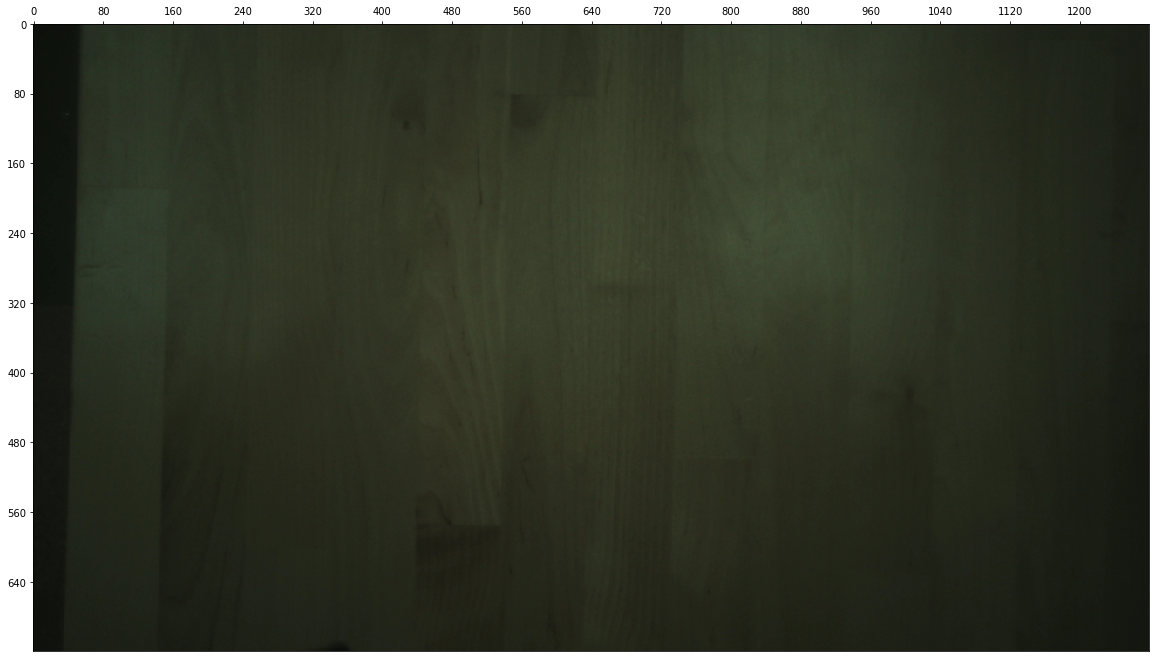

In [24]:
ir = rm.get_ir_image()

view = rm.IR_Viewer()
view.add_image(ir)
view.show()

# Depth Images
<br> The third datatype that we can get from the camera is a depth image. The depth image holds the same information as the point cloud, but the valuse are mapped to the 
    1280 x 720 image rather than coordinates in cartesian space. The depth image can be viewed similar to the IR image.

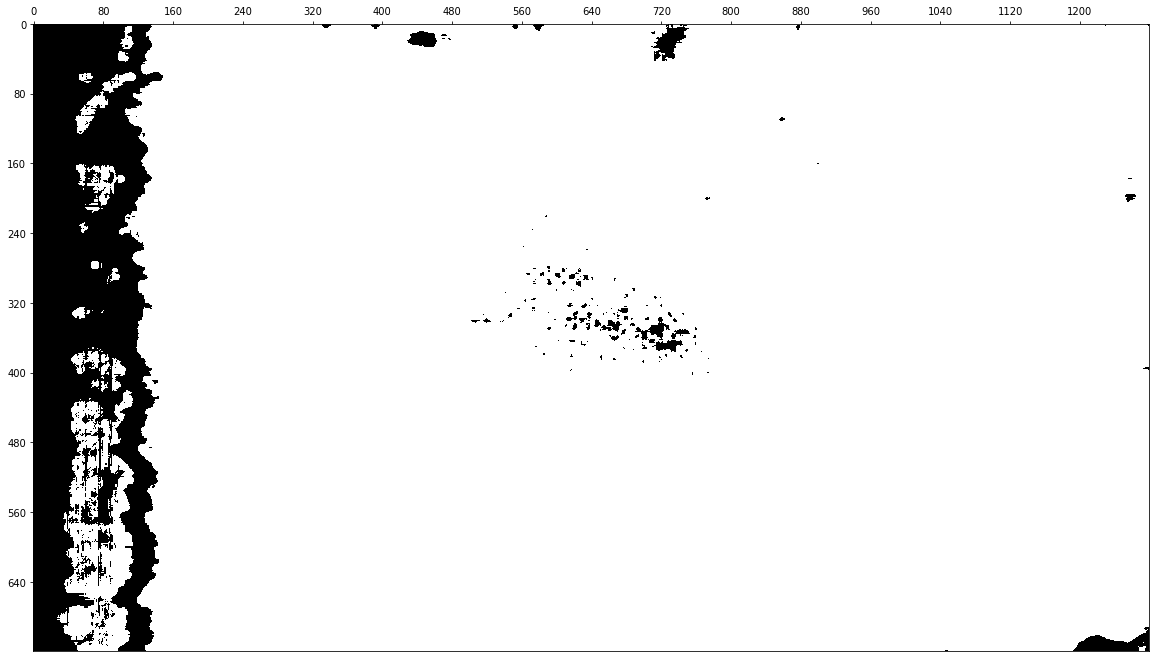

In [25]:
depth = rm.get_depth_image()

view = rm.IR_Viewer()
view.add_image(depth)
view.show()